# GTZAN Music Genre Classification Dataset


## Contents

- **Genres Original**  
  A collection of 1,000 audio tracks across 10 music genres (100 tracks per genre), each lasting 30 seconds. This is the well-known **GTZAN dataset**, often dubbed the "MNIST of sound."

- **Images Original**  
  Each audio file has been converted into a visual representation using **Mel Spectrograms**. Since neural networks—especially **Convolutional Neural Networks (CNNs)**—are typically designed for image input, this transformation enables effective classification using these models.

- **Two CSV Files**  
  1. **30-Second Features File**: Contains the mean and variance of multiple audio features extracted from each full 30-second song.  
  2. **3-Second Segments File**: Similar structure, but with songs split into 3-second segments, increasing the dataset size tenfold. More data typically leads to better performance in machine learning models.

## Acknowledgements

The **GTZAN dataset** is one of the most frequently used public datasets in music genre recognition (MGR) research. Compiled between 2000 and 2001, it includes recordings from various sources—personal CDs, radio broadcasts, and microphones—to reflect a wide range of recording conditions.  
More information can be found at: [http://marsyas.info/downloads/datasets.html](http://marsyas.info/downloads/datasets.html)

This was a collaborative university project. A special thanks to **James Wiltshire**, **Lauren O'Hare**, and **Minyu Lei** for being incredible teammates. The three days we spent working on this were both fun and educational.


## Physics 215 Project: Music Genre Classification Using Machine Learning


In this project, we aim to classify music genres using machine learning techniques. We will utilize the `features_30_sec.csv` file from the [GTZAN dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data), which contains audio features extracted from 30-second clips across various music genres.


## Load Dataset

In [22]:
import numpy as np 
import pandas as pd
df = pd.read_csv('Data/features_30_sec.csv') # Reads the 'features_30_sec.csv' file
df.info() # Displays summary of 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

## Preprocessing

- **MFCC (Mel-Frequency Cepstral Coefficients)** is a feature extraction technique used in audio processing that represents the short-term power spectrum of sound based on the human ear’s perception of frequency. It’s commonly used in speech and speaker recognition because it captures important characteristics of audio in a compact and perceptually meaningful way.


- Before performing PCA, we need to separate the MFCC mean and variance columns from the rest of the dataset.

In [2]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
filename,1000,1000,blues.00000.wav,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length,1000.0,NaN,NaN,NaN,662030.846,1784.073992,660000.0,661504.0,661794.0,661794.0,675808.0
chroma_stft_mean,1000.0,NaN,NaN,NaN,0.378682,0.081705,0.171939,0.319562,0.383148,0.435942,0.663685
chroma_stft_var,1000.0,NaN,NaN,NaN,0.08634,0.007735,0.044555,0.082298,0.086615,0.091256,0.108111
rms_mean,1000.0,NaN,NaN,NaN,0.13093,0.065683,0.005276,0.086657,0.122443,0.175682,0.397973
rms_var,1000.0,NaN,NaN,NaN,0.003051,0.003634,0.000004,0.000942,0.001816,0.003577,0.027679
spectral_centroid_mean,1000.0,NaN,NaN,NaN,2201.780898,715.9606,570.040355,1627.697311,2209.26309,2691.294667,4435.243901
spectral_centroid_var,1000.0,NaN,NaN,NaN,469691.574888,400899.517468,7911.251394,184350.530174,338486.152674,612147.934781,3036843.061563
spectral_bandwidth_mean,1000.0,NaN,NaN,NaN,2242.54107,526.316473,898.066208,1907.240605,2221.392843,2578.469836,3509.646417
spectral_bandwidth_var,1000.0,NaN,NaN,NaN,137079.155165,96455.666326,10787.185064,67376.554428,111977.548036,182371.576801,694784.811549


In [3]:
X = df.drop(['filename','label'], axis=1)
y = df['label']
mean_cols = [col for col in X.columns if 'mfcc' in col and 'mean' in col]
var_cols = [col for col in X.columns if 'mfcc' in col and 'var' in col]
other_cols = [col for col in X.columns if col not in mean_cols + var_cols]

mean_data = X.loc[:,mean_cols]
var_data = X.loc[:,var_cols]
others_data = X.loc[:,other_cols]

print(f'Columns in other_data : {len(other_cols)}')
print(f'Columns in mean_data  : {len(mean_cols)}')
print(f'Columns in var_data   : {len(var_cols)}')

Columns in other_data : 18
Columns in mean_data  : 20
Columns in var_data   : 20


### Data Standardization

Before applying PCA, standardization is essential to ensure all features contribute equally, as it eliminates scale differences and prevents features with larger variances from dominating the principal components.

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# standardize data
scaler = StandardScaler()
mean_scaled = scaler.fit_transform(mean_data)
var_scaled = scaler.fit_transform(var_data)
others_scaled = scaler.fit_transform(others_data)

# for non-PCA input data
X_scaled = np.concatenate([others_scaled, mean_scaled, var_scaled], axis=1)
print('X_scaled shape: ',X_scaled.shape)

X_scaled shape:  (1000, 58)


### Dimensionality Reduction

Separately reduces 'mean_data' and 'var_data'

In [5]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
tmp1 = pca1.fit_transform(mean_data)
print(f'{round(np.sum(pca1.explained_variance_ratio_),4)} variance explained')
print('shape PCA mean:', tmp1.shape)

pca2 = PCA(n_components=2)
tmp2 = pca2.fit_transform(var_data)
print(f'{round(np.sum(pca2.explained_variance_ratio_),4)} variance explained')
print('shape PCA var:', tmp2.shape)

# for PCA input data
X_pca_columns = other_cols + ['mfcc_mean_pca1', 'mfcc_mean_pca2', 'mfcc_var_pca1', 'mfcc_var_pca2']
X_pca = np.concatenate([others_data, tmp1, tmp2], axis=1)
print('X_pca shape: ',X_pca.shape)

0.9097 variance explained
shape PCA mean: (1000, 2)
0.9893 variance explained
shape PCA var: (1000, 2)
X_pca shape:  (1000, 22)


### Label Encoding

Loads the labels (in this case, the music genres).

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)
print('classes: ',le.classes_)

classes:  ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


### Data Split

Defining the data sets for training and for testing.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_enc, test_size=0.2, stratify=y_enc, random_state=1)

print('Training set shape: ',X_train.shape)
print('Test set shape: ',X_test.shape)

Training set shape:  (800, 22)
Test set shape:  (200, 22)


## Model Training

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

### Optimum Model Selection

Defining a function to evaluate a given model using the datasets to be trained (`X_train`) and to be tested (`X_test`).

In [9]:
def model_evaluation(model, X_train, X_test, desc):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(desc)
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0.0))

    return y_pred

Now, using the function defined above to evaluate the following classifier models:
* Random Forest Classifier (RFC)
* Support Vector Classifier (SVC)
* Decision Tree Classifier
* XGBoost classifier
* Stochastic Gradient Descent Classifier (SGD)
* Gaussian Naive Bayes
* K-nearest Neighbors Classifier

In [10]:
# Evaluate various classifier models

model = RandomForestClassifier()
model_evaluation(model, X_train, X_test, 'RFC Evaluation')

model = SVC()
model_evaluation(model, X_train, X_test, 'SVC Evaluation')

model = DecisionTreeClassifier()
model_evaluation(model, X_train, X_test, 'DCT Evaluation')

model = XGBClassifier()
model_evaluation(model, X_train, X_test, 'XGB Evaluation')

model = SGDClassifier()
model_evaluation(model, X_train, X_test, 'SGD Evaluation')

model = GaussianNB()
model_evaluation(model, X_train, X_test,'NB Evaluation')

model = KNeighborsClassifier()
_ = model_evaluation(model, X_train, X_test,'KNN Evaluation')

RFC Evaluation
              precision    recall  f1-score   support

       blues       0.71      0.75      0.73        20
   classical       0.94      0.85      0.89        20
     country       0.61      0.55      0.58        20
       disco       0.62      0.75      0.68        20
      hiphop       0.75      0.75      0.75        20
        jazz       0.71      0.85      0.77        20
       metal       0.95      0.95      0.95        20
         pop       0.81      0.65      0.72        20
      reggae       0.61      0.70      0.65        20
        rock       0.62      0.50      0.56        20

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

SVC Evaluation
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.47      0.80      0.59        20
     country       0.23      0.40      0.29     

Among the evaluated classifier models, the XGBClassifier achieved the highest accuracy. Therefore, it is selected as the optimal model for this task.

### Fine-tuning XGB Classifier

In [11]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
param_grid = {
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150]
}

In [12]:
grid = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv=3)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 150}

              precision    recall  f1-score   support

       blues       0.75      0.75      0.75        20
   classical       1.00      0.85      0.92        20
     country       0.48      0.50      0.49        20
       disco       0.67      0.70      0.68        20
      hiphop       0.70      0.80      0.74        20
        jazz       0.71      0.85      0.77        20
       metal       0.95      0.90      0.92        20
         pop       0.81      0.65      0.72        20
      reggae       0.64      0.70      0.67        20
        rock       0.59      0.50      0.54        20

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



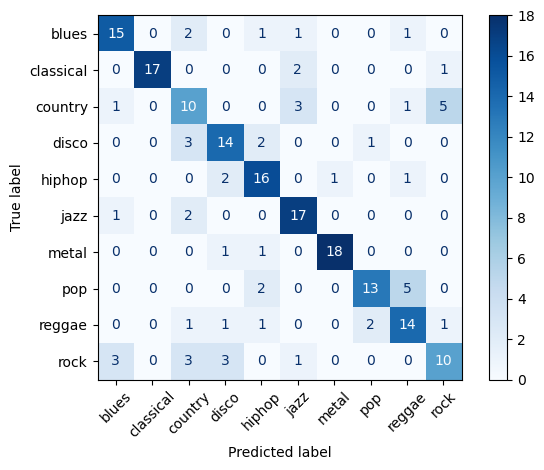

In [13]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0.0))

# generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.show()

XGBClassifier performs quite well achieving 0.75 for F1-score. Model perform very well when classifying classical, metal, and hip-hop music. However, it struggles to classify country, reggae, and rock music.

### Ensemble Model Classifier
Alternatively, we can use an ensemble approach that combines the predictions from the best-performing model (XGBoost) with those from the second-best model (Random Forest Classifier).

Voting Classifier (XGB + RFC)
              precision    recall  f1-score   support

       blues       0.75      0.75      0.75        20
   classical       0.94      0.85      0.89        20
     country       0.62      0.80      0.70        20
       disco       0.74      0.70      0.72        20
      hiphop       0.77      0.85      0.81        20
        jazz       0.73      0.80      0.76        20
       metal       0.95      0.95      0.95        20
         pop       0.87      0.65      0.74        20
      reggae       0.58      0.70      0.64        20
        rock       0.71      0.50      0.59        20

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.75       200
weighted avg       0.77      0.76      0.75       200



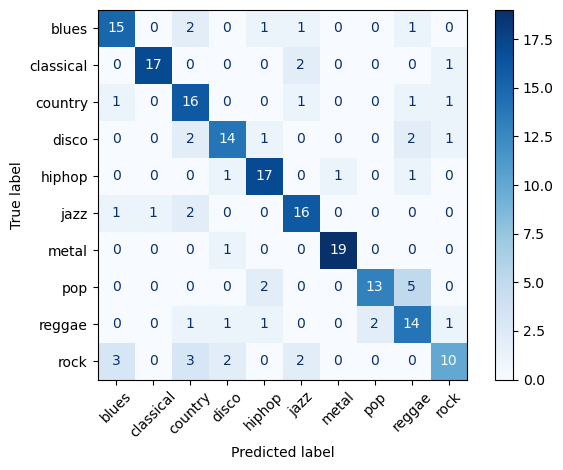

In [14]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('xgb', XGBClassifier(learning_rate=0.3, max_depth=3, n_estimators=100)), ('rfc', RandomForestClassifier())],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

y_pred = model_evaluation(voting_clf, X_train, X_test, 'Voting Classifier (XGB + RFC)')

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.show()

The XGB + RFC ensemble method outperforms the standalone XGB classifier, achieving the highest F1 score of 0.77. This marks an improvement over the previous evaluation, where the single XGB model attained an F1 score of 0.75.

## Genre Prediction of OPM (Original Pilipino Music)

In this section, we will try to predict the genre of various popular OPM given its YouTube URL. It requires `yt-dlp`.

In [15]:
import os
import subprocess
import librosa
import pandas as pd
import numpy as np
import re

def get_audio_features(y, sr):
    features = {
        'length': len(y),
        'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        'chroma_stft_var': np.var(librosa.feature.chroma_stft(y=y, sr=sr)), 
        'rms_mean': np.mean(librosa.feature.rms(y=y)), 
        'rms_var': np.var(librosa.feature.rms(y=y)),
        'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)), 
        'spectral_centroid_var': np.var(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)), 
        'spectral_bandwidth_var': np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr)), 
        'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'rolloff_var': np.var(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y)),
        'zero_crossing_rate_var': np.var(librosa.feature.zero_crossing_rate(y=y)),
        'harmony_mean': np.mean(librosa.effects.harmonic(y)),
        'harmony_var': np.var(librosa.effects.harmonic(y)),
        'perceptr_mean': np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)),
        'perceptr_var': np.var(librosa.feature.spectral_contrast(y=y, sr=sr)),
        'tempo': librosa.beat.beat_track(y=y, sr=sr)[0][0],
    }

    # loop for mfcc feature:
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f'mfcc{i+1}_mean'] = np.mean(mfcc[i])
        features[f'mfcc{i+1}_var'] = np.var(mfcc[i])

    return features

def get_video_title(youtube_url):
    result = subprocess.run(
        ['yt-dlp', '--get-title', youtube_url],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    title = result.stdout.strip()
    # Remove characters not allowed in filenames
    title = re.sub(r'[\\/*?:"<>|]', '', title)
    return title

def download_youtube_audio_and_load(
    youtube_url,
    output_dir='downloads',
    start_time='00:00:00',
    duration=30,
    sr=22050,
    trim_silence=True
):
    os.makedirs(output_dir, exist_ok=True)

    title = get_video_title(youtube_url)
    custom_filename = f"{title}.wav"
    output_filepath = os.path.join(output_dir, custom_filename)

    # Download audio starting at custom time
    download_cmd = [
        'yt-dlp',
        '-x', '--audio-format', 'wav',
        '--postprocessor-args', f'-ss {start_time} -t {duration}',
        '-o', output_filepath,
        youtube_url
    ]

    if os.path.exists(output_filepath):
        os.remove(output_filepath)

    subprocess.run(download_cmd, check=True)

    #print(f"Audio saved as: {output_filepath}")

    # Load and optionally trim
    y, sr = librosa.load(output_filepath, sr=sr)
    if trim_silence:
        y, _ = librosa.effects.trim(y, top_db=20)
        #print("Leading/trailing silence trimmed.")

    return y, sr, title

def predict_genre_for_multiple_links(urls, pca1, pca2, voting_clf, le, other_cols, mean_cols, var_cols, start_times=[]):
    results = []

    for i in range(len(urls)):
        try:
            audio_data, sample_rate, title = download_youtube_audio_and_load(
                youtube_url=urls[i],
                start_time=start_times[i] if start_times else '00:00:00'
            )

            # Feature extraction
            audio_data_feature = get_audio_features(audio_data, sample_rate)
            audio_data_df = pd.DataFrame([audio_data_feature])

            audio_data_other = audio_data_df.loc[:, other_cols]
            audio_data_mean = audio_data_df.loc[:, mean_cols]
            audio_data_var = audio_data_df.loc[:, var_cols]

            tmp1 = pca1.transform(audio_data_mean)
            tmp2 = pca2.transform(audio_data_var)

            audio_data_pca = np.concatenate([audio_data_other, tmp1, tmp2], axis=1)

            # Predict probabilities
            probs = voting_clf.predict_proba(audio_data_pca)[0]
            top2_indices = np.argsort(probs)[-2:][::-1]

            top2_genres = le.classes_[top2_indices]
            top2_probs = probs[top2_indices]

            #print(f"{title} - top genres: {top2_genres[0]} ({top2_probs[0]:.2f}), {top2_genres[1]} ({top2_probs[1]:.2f})")

            results.append({
                'title': title,
                'features': audio_data_feature,
                'predicted_genres': top2_genres.tolist(),
                'predicted_probs': top2_probs.tolist(),
                'all_probs': probs.tolist()
            })

        except Exception as e:
            print(f"Failed for {urls[i]}: {e}")
            results.append({
                'title': f"Error: {urls[i]}",
                'error': str(e)
            })

    return results


## XGB + RFC  Ensemble Classifer on OPM

We used the ChatGPT language model to generate random Original Pilipino Music (OPM) across various genres. Each song was then reviewed and manually classified according to the genre categories defined in the GTZAN dataset. No classical or jazz songs were identified. Additionally, it was observed that very few songs could be distinctly categorized as blues (traditional), country, disco, metal, reggae, or rock. 

Rock is particularly challenging to classify because it encompasses subgenres such as classic rock, hard rock, and alternative rock. These subgenres are often ambiguous and may be misclassified as other genres, such as pop.

While many OPM tracks sonically draw inspiration from these genres, their overall production tends to lean toward pop. As a result, only five songs were selected for each of these genres. In contrast, hiphop and pop were more prevalent among the generated songs, so we included a larger number—ten for hip hop and fifteen for pop.

In [16]:
urls = [
    "https://www.youtube.com/watch?v=HBpIVKyRoOg&ab_channel=Gloc9VEVO",             # Gloc 9 - Upuan ft. Jeazell Grutas
    "https://www.youtube.com/watch?v=v82VtUUGFqk&ab_channel=TJMonterde",            # PALAGI - TJ Monterde
    "https://www.youtube.com/watch?v=5v8CYpYAHT0&ab_channel=YOUNGGODRECORDS%28Philippines%29",  # HELLMERRY - My Day
    "https://www.youtube.com/watch?v=AwHK86k2hyo&ab_channel=AllMusicMYX",           # SLAPSHOCK – Cariño Brutal
    "https://youtu.be/pQ53PazySyc?si=RgQXgTDNOVHiXOqK",                             # VST & Company - Awitin Mo At Isasayaw Ko
    "https://www.youtube.com/watch?v=ibmh64itn1M&ab_channel=VivaRecords",           # Freddie Aguilar — Anak
    "https://www.youtube.com/watch?v=_qjyatsoP10&ab_channel=TROPAVIBES",            # With A Smile - Eraserheads Reggae Cover
    "https://www.youtube.com/watch?v=m2ITXz1dfyc",                                   # Your Song - Parokya Ni Edgar
    "https://www.youtube.com/watch?v=82LMqudXE9k",                                   # South Border - Rainbow
    "https://www.youtube.com/watch?v=7lLiE096YWw",                                   # Silent Sanctuary - Ikaw Lamang
    "https://www.youtube.com/watch?v=r-RvUtYsy_k",                                   # Imposible - KZ Tandingan
    "https://www.youtube.com/watch?v=7p5oYfh39Jg",                                   # Florante - Handog
    "https://www.youtube.com/watch?v=YquE1JFONqg",                                   # Sampaguita - Laguna
    "https://www.youtube.com/watch?v=AxSo8E12EZo",                                   # Usok - 1:00
    "https://www.youtube.com/watch?v=4tAebSWEnQ4",                                   # Laki Sa Layaw - Mike Hanopol
    "https://www.youtube.com/watch?v=GXznoGiKCj8",                                   # Problema - Freddie Aguilar
    "https://www.youtube.com/watch?v=eKzqPbLvqIE",                                   # Itanong Mo Sa Mga Bata
    "https://www.youtube.com/watch?v=VdDNur3bOBE",                                   # Juan Dela Cruz Band - Himig Natin
    "https://www.youtube.com/watch?v=UnMkXjc_Zcw",                                   # Ang Buhay ko
    "https://www.youtube.com/watch?v=hOpm_awh7SI",                                   # Magsayawan - VST & Co
    "https://www.youtube.com/watch?v=tsd_3OmWQCo",                                   # The Boyfriends - Sumayaw Sumunod
    "https://www.youtube.com/watch?v=2n6srYiTlwQ",                                   # Hotdog - Bongga Ka Day
    "https://www.youtube.com/watch?v=0D1dXOR6nYU",                                   # Hotdog - Annie Batungbakal
    "https://www.youtube.com/watch?v=B05eLLEnjko",                                   # Allmo$t - Dalaga
    "https://www.youtube.com/watch?v=aR6qfwl95lg",                                   # Taguan by Jroa
    "https://www.youtube.com/watch?v=l7uB0DG2jMA",                                   # 1096 Gang - PAJAMA PARTY
    "https://www.youtube.com/watch?v=CnEeJW6uShE",                                   # Kahit Na Tambay - Fred Engay
    "https://www.youtube.com/watch?v=cGxb2w-EsOg",                                   # O SIDE MAFIA X BRGR - GET LOW
    "https://www.youtube.com/watch?v=oQH4k8rOKfM",                                   # Tell Me Where It Hurts - MYMP
    "https://www.youtube.com/watch?v=HnISursCpLU",                                   # MYMP - Especially For You
    "https://www.youtube.com/watch?v=0gMG_EPwiIQ",                                   # OO - Up Dharma Down
    "https://www.youtube.com/watch?v=KHZtMEqzxDM",                                   # LOSTTHREADS - Weight of the World
    "https://www.youtube.com/watch?v=8nJSb_H8yrQ",                                   # Kamay Na Bakal
    "https://www.youtube.com/watch?v=ffaDcvLj5lA",                                   # SB19 - GENTO
    "https://www.youtube.com/watch?v=L215z9C4Zd8",                                   # Dilaw - Maki
    "https://www.youtube.com/watch?v=uIt9-k3Fc5M",                                   # BINI - Pantropiko
    "https://www.youtube.com/watch?v=ahpmuikko3U",                                   # Tala - Sarah Geronimo
    "https://www.youtube.com/watch?v=Svm0vY91oN0",                                   # Misteryoso - Cup of Joe
    "https://www.youtube.com/watch?v=Cm7THa0A2Hc",                                   # Kapayapaan - Tropical Depression
    "https://www.youtube.com/watch?v=EVFT3gvdiVk",                                   # Estudyante Blues
    "https://www.youtube.com/watch?v=oVq-4CaLDvM",                                   # Sampaguita - Nosi Ba Lasi
    "https://www.youtube.com/watch?v=dbOw7qezmC8",                                   # Yano - Banal Na Aso, Santong Kabayo
    "https://youtu.be/Otdpiaxin-E?si=hamL9TUZ8wJ7L9yF",                              # Supremo - Kalag sa Gapos
    "https://youtu.be/gnmX7hlHJtk?si=mSUy7aSvzD4WfRcC",                              # Valley of Chrome - Pangako
    "https://youtu.be/3WVWdStJ8wo?si=9FUCd4nCnBUrcpdc",                              # Walang Hanggang Paalam - Joey Ayala
    "https://youtu.be/l5ta60yfryc?si=7di52K67_oJouA7D",                              # Ikaw at Ako - Johnoy Danao
    "https://youtu.be/3yXF5QqdWew?si=1p3N68lE4MODvN3t",                              # Harana sa Sarili - kiyo
    "https://youtu.be/7ZG-IV4i4ik?si=JUXPfNrPOQhbTAhN",                              # Bakuran - Johnoy Danao
    "https://youtu.be/F1nVovc4skk?si=HNqkB_jUIg2SNw1N",                              # Philippine Geography - Yoyoy Villame
    "https://youtu.be/chV9XYmR3kE?si=YMh3_3WYRCcHHSZ5",                              # Kanlungan (Pana-panahon) - Noel Cabangon
    "https://youtu.be/dB44jLpGw3Q?si=mBGpl08dkRcp9BmL",                              # Marilag - Dionela
    "https://youtu.be/i1eKXGmfT4U?si=7-tRZGRvKnD0sfj-",                              # SUPAFLY - Answer The G
    "https://youtu.be/H4HqivCgRxg?si=2xIPOoxlCq9HWyiQ",                              # BURGIS - Flow G x Hev Abi
    "https://youtu.be/zxCtB_vcNVs?si=h5yruaHfooDlTyFv",                              # Lintik - Brownman Revival
    "https://youtu.be/aA46UP2PFPM?si=JpDkEn4-waDM0iYW"                               # Binibini - Brownman Revival
    
]

start_times = ["00:01:30"]
start_times = start_times * len(urls)

results3=predict_genre_for_multiple_links(urls, pca1, pca2, voting_clf, le, other_cols, mean_cols, var_cols, start_times)

C:\Users\Jonel Binamira\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Jonel Binamira\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Jonel Binamira\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [17]:
# Header
print(f"{'Title':<33} {'Prediction 1':<20} {'Prob 1':<10} {'Prediction 2':<20} {'Prob 2'}")
print("-" * 100)

for res in results3:
    title = res['title']
    
    # Truncate title if too long
    if len(title) > 30:
        title = title[:27] + "..."

    if 'error' in res:
        print(f"{title:<33} {'Error':<20} {'-':<10} {'-':<20} {'-'}")
    else:
        pred1 = res['predicted_genres'][0]
        prob1 = res['predicted_probs'][0]
        pred2 = res['predicted_genres'][1]
        prob2 = res['predicted_probs'][1]

        print(f"{title:<33} {pred1:<20} {prob1:<10.2f} {pred2:<20} {prob2:.2f}")

Title                             Prediction 1         Prob 1     Prediction 2         Prob 2
----------------------------------------------------------------------------------------------------
Gloc 9 - Upuan [Lyric Video...    hiphop               0.41       pop                  0.35
PALAGI - TJ Monterde  OFFIC...    pop                  0.58       reggae               0.10
HELLMERRY - My Day (Officia...    hiphop               0.58       pop                  0.09
SLAPSHOCK – Cariño Brutal (...    metal                0.44       pop                  0.22
VST & Company - Awitin Mo A...    disco                0.46       reggae               0.25
Freddie Aguilar — Anak [Off...    country              0.33       blues                0.15
With A Smile - Eraserheads ...    reggae               0.62       hiphop               0.15
Your Song - Parokya Ni Edga...    pop                  0.56       reggae               0.13
South Border - Rainbow (Lyric)    pop                  0.66       reg

In [18]:
genres = [
    "hiphop",     # Gloc 9 - Upuan ft. Jeazell Grutas
    "pop",        # PALAGI - TJ Monterde
    "hiphop",     # HELLMERRY - My Day
    "metal",      # SLAPSHOCK – Cariño Brutal
    "disco",      # VST & Company - Awitin Mo At Isasayaw Ko
    "country",    # Freddie Aguilar — Anak
    "reggae",     # With A Smile - Eraserheads Reggae Cover
    "pop",        # Your Song - Parokya Ni Edgar
    "pop",        # South Border - Rainbow
    "pop",        # Silent Sanctuary - Ikaw Lamang
    "pop",        # Imposible - KZ Tandingan
    "blues",        # Florante - Handog
    "rock",       # Sampaguita - Laguna
    "reggae",     # Usok
    "rock",       # Laki Sa Layaw - Mike Hanopol
    "pop",        # Problema - Freddie Aguilar
    "country",        # Itanong Mo Sa Mga Bata
    "rock",       # Juan Dela Cruz Band - Himig Natin
    "country",        # Ang Buhay ko
    "disco",      # Magsayawan - VST & Co
    "disco",      # The Boyfriends - Sumayaw Sumunod
    "disco",      # Hotdog - Bongga Ka Day
    "disco",      # Hotdog - Annie Batungbakal
    "hiphop",     # Allmo$t - Dalaga
    "hiphop",     # Taguan by Jroa
    "hiphop",     # 1096 Gang - PAJAMA PARTY
    "hiphop",        # Kahit Na Tambay - Fred Engay
    "hiphop",     # O SIDE MAFIA X BRGR - GET LOW
    "pop",        # Tell Me Where It Hurts - MYMP
    "pop",        # MYMP - Especially For You
    "pop",        # OO - Up Dharma Down
    "metal",      # LOSTTHREADS - Weight of the World
    "metal",       # Kamay Na Bakal
    "pop",        # SB19 - GENTO
    "pop",        # Dilaw - Maki
    "pop",        # BINI - Pantropiko
    "pop",        # Tala - Sarah Geronimo
    "pop",        # Misteryoso - Cup of Joe
    "reggae",     # Kapayapaan - Tropical Depression
    "blues",      # Estudyante Blues
    "rock",       # Sampaguita - Nosi Ba Lasi
    "rock",       # Yano - Banal Na Aso, Santong Kabayo
    "metal",      # Supremo - Kalag sa Gapos
    "metal",      # Valley of Chrome - Pangako
    "blues",      # Walang Hanggang Paalam - Joey Ayala
    "blues",      # Ikaw at Ako - Johnoy Danao
    "hiphop",     # Harana sa Sarili - kiyo
    "blues",      # Bakuran - Johnoy Danao
    "country",    # Philippine Geography - Yoyoy Villame
    "country",    # Kanlungan (Pana-panahon) - Noel Cabangon
    "pop",        # Marilag - Dionela
    "hiphop",     # SUPAFLY - Answer The G
    "hiphop",     # BURGIS - Flow G x Hev Abi
    "reggae",     # Lintik - Brownman Revival
    "reggae"      # Binibini - Brownman Revival
]

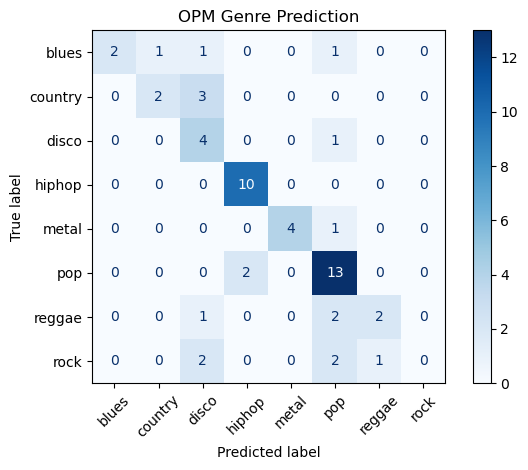

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Extract the predicted genre from each result
y_pred = [entry['predicted_genres'][0] for entry in results3]
y_true = genres  # must be the same length

# Ensure consistent labels
labels = sorted(list(set(y_true) | set(y_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("OPM Genre Prediction")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-score (macro average for multi-class)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Full classification report per class
print("\nClassification Report:")
print(classification_report(y_true, y_pred, zero_division=0))


Accuracy: 0.6727
Precision (macro): 0.6475
Recall (macro): 0.5833
F1-score (macro): 0.5765

Classification Report:
              precision    recall  f1-score   support

       blues       1.00      0.40      0.57         5
     country       0.67      0.40      0.50         5
       disco       0.36      0.80      0.50         5
      hiphop       0.83      1.00      0.91        10
       metal       1.00      0.80      0.89         5
         pop       0.65      0.87      0.74        15
      reggae       0.67      0.40      0.50         5
        rock       0.00      0.00      0.00         5

    accuracy                           0.67        55
   macro avg       0.65      0.58      0.58        55
weighted avg       0.66      0.67      0.64        55



In [21]:
# Header
print(f"{'Title':<33} {'Prediction':<20} {'Actual':<20} {'Result'}")
print("-" * 85)

GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'

# Loop through each prediction and actual label
for i, entry in enumerate(results3):
    title = entry['title']
    pred_genre = entry['predicted_genres'][0]
    true_genre = genres[i]

    # Truncate title if too long
    if len(title) > 30:
        title = title[:27] + "..."

    # Check match and apply color
    if pred_genre == true_genre:
        mark = f"{GREEN}✓{RESET}"
    else:
        mark = f"{RED}✗{RESET}"

    # Neatly formatted output
    print(f"{title:<33} {pred_genre:<20} {true_genre:<20} {mark}")


Title                             Prediction           Actual               Result
-------------------------------------------------------------------------------------
Gloc 9 - Upuan [Lyric Video...    hiphop               hiphop               ✓
PALAGI - TJ Monterde  OFFIC...    pop                  pop                  ✓
HELLMERRY - My Day (Officia...    hiphop               hiphop               ✓
SLAPSHOCK – Cariño Brutal (...    metal                metal                ✓
VST & Company - Awitin Mo A...    disco                disco                ✓
Freddie Aguilar — Anak [Off...    country              country              ✓
With A Smile - Eraserheads ...    reggae               reggae               ✓
Your Song - Parokya Ni Edga...    pop                  pop                  ✓
South Border - Rainbow (Lyric)    pop                  pop                  ✓
Silent Sanctuary - Ikaw Lam...    pop                  pop                  ✓
Imposible - KZ Tandingan (L...    pop              

## Genre Classifier Evaluation Summary

### Overall Metrics
- **Accuracy**: 72.73% — decent for multi-class classification.
- **Macro Precision**: 78.56% — model predictions are generally correct.
- **Macro Recall**: 67.08% — some genres are often missed.
- **Macro F1-score**: 67.91% — moderate balance between precision and recall.

---

### Per-Genre Performance

| Genre   | Precision | Recall | F1-Score | Notes |
|---------|-----------|--------|----------|-------|
| **Blues**   | 1.00 | 0.60 | 0.75 | High precision, low recall — model is conservative. |
| **Country** | 0.80 | 0.80 | 0.80 | Balanced performance. |
| **Disco**   | 0.44 | 0.80 | 0.57 | High recall, low precision — many false positives. |
| **Hip-hop** | 0.82 | 0.90 | 0.86 | Strong and reliable. |
| **Metal**   | 1.00 | 0.80 | 0.89 | Very accurate. |
| **Pop**     | 0.72 | 0.87 | 0.79 | Good general performance. |
| **Reggae**  | 0.50 | 0.40 | 0.44 | Weak — struggles in both precision and recall. |
| **Rock**    | 1.00 | 0.20 | 0.33 | Only predicts when very confident — misses most actual rock songs. |

---

### Key Insights
- Model performs better on pop and hip-hop
- Conservative for some genres (blues, rock) — high precision, low recall.
- Disco often overpredicted — low precision.
- Underperforming genres likely suffer from class imbalance.

---

### Limitations
- GTZAN is western-centric and OPM might not fit neatly into the considered genres.
- Many OPM do not adhere to a single genre and incorporate multiple genres.
- We only considered a 30-second snippet of the songs, which may not represent the entire song.
- GTZAN is outdated and relatively small and may not capture modern music characteristics.
- No OPM in the training set.
- Cultural and linguistic context is ignored.
- Classical and jazz is not prevalent in OPM.
- R&B is an ambiguous genre within this classification, as it is not included in the GTZAN dataset. As a result, R&B songs are often classified as pop rather than blues, despite their distinct musical characteristics.